In [1]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive

Mounted at /gdrive/
/gdrive


In [2]:
ls

MyDrive/  Shareddrives/


In [3]:
cd/gdrive/My Drive/sport celebrity classification/

/gdrive/My Drive/sport celebrity classification


In [4]:
ls

'Kane Williamson'/  'Maria Sharapova'/   Ronaldo/
'Kobe Bryant'/      'MS Dhoni'/         'Sports Celebrity Classification.h5'


In [5]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.preprocessing.image import load_img

In [6]:
import os
import PIL
import pathlib
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import preprocessing
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.python.ops.numpy_ops import np_utils

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications import ResNet50
import keras as k

In [7]:
BATCH_SIZE = 62
IMAGE_SIZE = 256
EPOCHS=40
CHANNELS=3

In [8]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/gdrive/My Drive/sport celebrity classification/",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 457 files belonging to 5 classes.


In [9]:
class_names = dataset.class_names
class_names

['Kane Williamson', 'Kobe Bryant', 'MS Dhoni', 'Maria Sharapova', 'Ronaldo']

In [10]:
len(dataset)

8

In [11]:
for image_batch, label_batch in dataset.take(1):
  print(image_batch.shape)
  print(image_batch[1])
  print(label_batch.numpy())

(62, 256, 256, 3)
tf.Tensor(
[[[228.       242.       251.      ]
  [228.       242.       251.      ]
  [228.       242.       251.      ]
  ...
  [253.       255.       252.      ]
  [252.08594  254.08594  251.08594 ]
  [252.       254.       251.      ]]

 [[227.11523  241.11523  250.11523 ]
  [227.11523  241.11523  250.11523 ]
  [227.11523  241.11523  250.11523 ]
  ...
  [253.       255.       252.      ]
  [252.08594  254.08594  251.08594 ]
  [252.       254.       251.      ]]

 [[226.52539  240.52539  249.52539 ]
  [226.52539  240.52539  249.52539 ]
  [226.52539  240.52539  249.52539 ]
  ...
  [252.05078  255.       252.94922 ]
  [251.13672  254.08594  252.03516 ]
  [251.05078  254.       251.94922 ]]

 ...

 [[161.26555  177.26555  190.26555 ]
  [153.8001   169.8001   182.97197 ]
  [  6.722183  22.722183  37.722183]
  ...
  [231.9051   243.8297   252.40077 ]
  [228.81078  244.94037  252.62695 ]
  [224.93375  242.15234  251.05852 ]]

 [[162.70113  178.70113  191.70113 ]
  [152.2

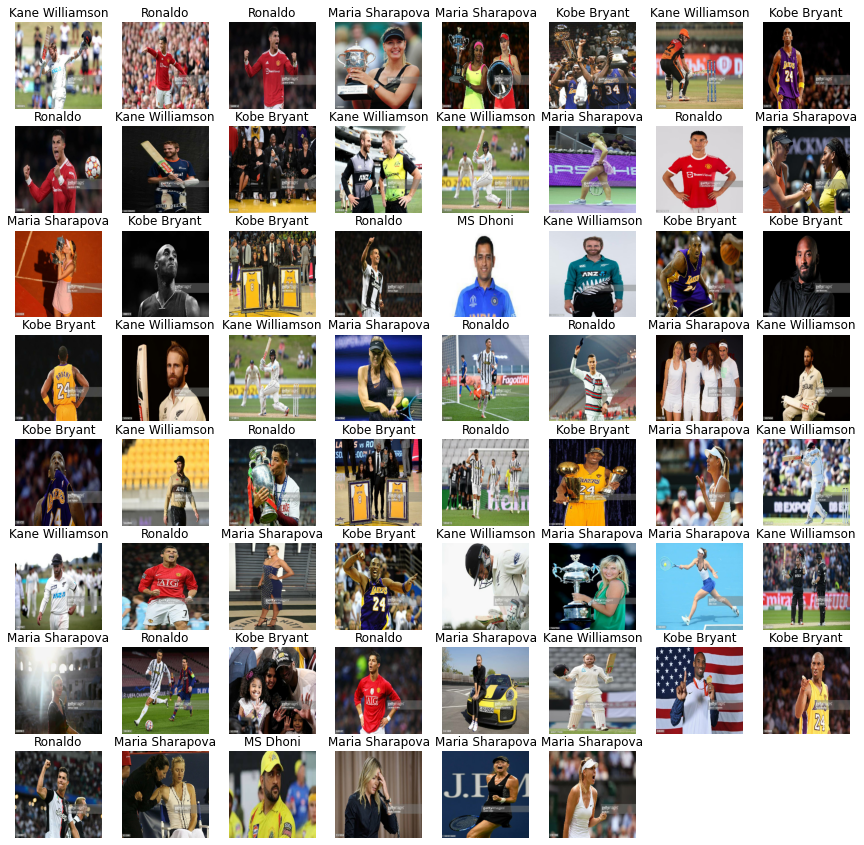

In [12]:
plt.figure(figsize=(15, 15))
for image_batch, labels_batch in dataset.take(1):
    for i in range(BATCH_SIZE):
        ax = plt.subplot(8, 8, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [13]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    # Autotune all the 3 datasets 
    train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    return train_ds, val_ds, test_ds

In [14]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [15]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [16]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

Sequential CNN

In [17]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 9

model = models.Sequential([
    resize_and_rescale,
    # data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)

In [18]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (62, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (62, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (62, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (62, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (62, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (62, 60, 60, 64)         

In [20]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/40
6/6 [==============================] - 41s 6s/step - loss: 1.9403 - accuracy: 0.2613
Epoch 2/40
6/6 [==============================] - 36s 6s/step - loss: 1.6024 - accuracy: 0.2102
Epoch 3/40
6/6 [==============================] - 36s 6s/step - loss: 1.5081 - accuracy: 0.3153
Epoch 4/40
6/6 [==============================] - 36s 6s/step - loss: 1.4725 - accuracy: 0.3544
Epoch 5/40
6/6 [==============================] - 36s 6s/step - loss: 1.4074 - accuracy: 0.3724
Epoch 6/40
6/6 [==============================] - 36s 6s/step - loss: 1.4503 - accuracy: 0.3694
Epoch 7/40
6/6 [==============================] - 36s 6s/step - loss: 1.3737 - accuracy: 0.4024
Epoch 8/40
6/6 [==============================] - 36s 7s/step - loss: 1.3056 - accuracy: 0.4775
Epoch 9/40
6/6 [==============================] - 36s 6s/step - loss: 1.2404 - accuracy: 0.4925
Epoch 10/40
6/6 [==============================] - 36s 6s/step - loss: 1.2048 - accuracy: 0.5075
Epoch 11/40
6/6 [======================

In [21]:
model.evaluate(test_ds)

2/2 [==============================] - 6s 2s/step - loss: 0.9367 - accuracy: 0.8952


[0.9367063045501709, 0.8951612710952759]

In [22]:
acc = history.history['accuracy']
loss = history.history['loss']

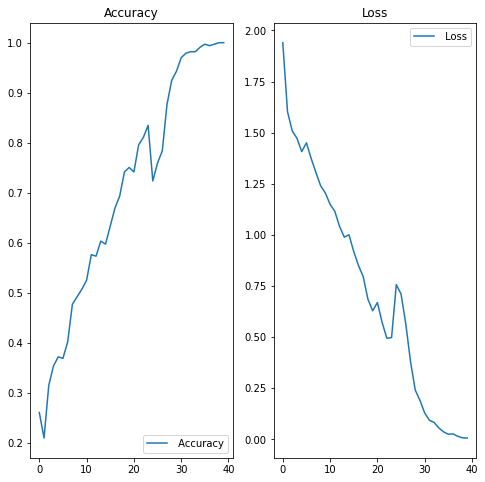

In [23]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label=' Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label=' Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

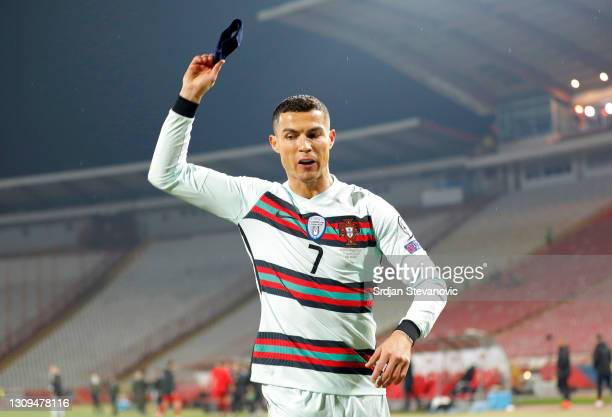

In [24]:
image_path = "/gdrive/My Drive/ronaldo_(77).jpg"
image = preprocessing.image.load_img(image_path)
image_array = preprocessing.image.img_to_array(image)
scaled_img = np.expand_dims(image_array, axis=0)
image

In [25]:
pred = model.predict(scaled_img)

In [26]:
output = class_names[np.argmax(pred)]

In [27]:
output

'Ronaldo'

In [28]:
model.save("Sequential model_cnn.h5")

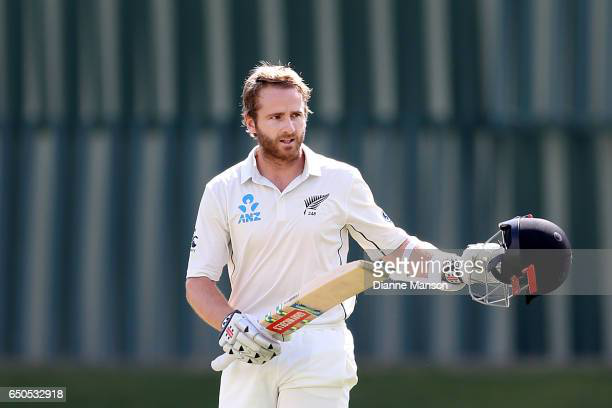

In [29]:
image_path = "/gdrive/My Drive/kane_(75).jpg"
image = preprocessing.image.load_img(image_path)
image_array = preprocessing.image.img_to_array(image)
scaled_img = np.expand_dims(image_array, axis=0)
image

In [30]:
pred = model.predict(scaled_img)

In [31]:
output = class_names[np.argmax(pred)]

In [32]:
output

'Kane Williamson'

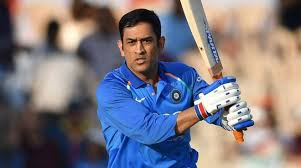

In [44]:
image_path = "/gdrive/My Drive/msd.jpeg"
image = preprocessing.image.load_img(image_path)
image_array = preprocessing.image.img_to_array(image)
scaled_img = np.expand_dims(image_array, axis=0)
image

In [45]:
pred = model.predict(scaled_img)

In [46]:
output = class_names[np.argmax(pred)]

In [47]:
output

'MS Dhoni'